In [28]:
#importing important packages and reading the dataset 
import pandas as pd
import numpy as np 
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
wnlemma=WordNetLemmatizer()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words=set(stopwords.words('english'))
df=pd.read_csv(r'amazon_alexa.tsv',delimiter='\t')
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [29]:

#normalization:convering text into lower case
df['verified_reviews']=df['verified_reviews'].apply(lambda x:str(x).lower())

#pre processing:removing tags and non alphabets 
df['verified_reviews']=df['verified_reviews'].str.replace(r'\d(.*)',' ')
df['verified_reviews']=df['verified_reviews'].apply(lambda x:re.sub('[^a-zA-Z]',' ',x))
df['verified_reviews']=df['verified_reviews'].apply(lambda x:(' ').join([w for w in x.split(' ') if not w=='']))
df['verified_reviews']




0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3              i have had a lot of fun with this thing my
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [30]:
#lemmatization:removing inflectional ending of same word

df['verified_reviews']=df['verified_reviews'].apply(lambda x:(' ').join([wnlemma.lemmatize(w) for w in word_tokenize(x) if not w in stop_words]))
df['verified_reviews']
    

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3                                           lot fun thing
4                                                   music
                              ...                        
3145                           perfect kid adult everyone
3146    listening music searching location checking ti...
3147    love thing running entire home tv light thermo...
3148    complaint sound quality great mostly use comma...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [31]:
#postag:parts of speech tagging of words and selecting only words of interest
from nltk.tokenize import word_tokenize
a=re.compile(r'NN(.*)')
b=re.compile(r'RB(.*)')
c=re.compile(r'JJ(.*)')
d=re.compile(r'VB(.*)')
for i in range(3150):
    doc=nltk.word_tokenize(df['verified_reviews'][i])
    postag=nltk.pos_tag(doc)
    postag=[s for s in postag if (a.search(s[1])!=None or b.search(s[1])!=None or c.search(s[1])!=None or d.search(s[1])!=None )]
    df['verified_reviews'][i]=(' ').join([s[0] for s in postag])
df['verified_reviews']
    


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3                                           lot fun thing
4                                                   music
                              ...                        
3145                           perfect kid adult everyone
3146    listening music searching location checking ti...
3147    love thing running entire home tv light thermo...
3148    complaint sound quality great mostly use comma...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [32]:
#word count:counting wors in each document
df['word_count']=df['verified_reviews'].apply(lambda x:len([w for w in x.split(' ')]))

In [33]:
#display word count of top 100 words
freq=pd.Series(' '.join(df['verified_reviews']).split()).value_counts()[:20]
freq

love       918
echo       701
great      668
alexa      474
work       468
music      466
use        406
sound      365
easy       320
set        274
dot        265
device     263
product    257
speaker    238
good       233
thing      225
play       220
get        216
time       198
amazon     189
dtype: int64

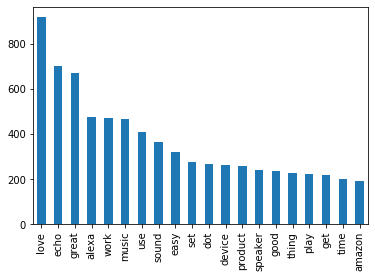

In [34]:
#plotting the words based on their word counts
plot=freq.plot.bar()
plot


In [35]:
#tagging the sentiment of the document based on customer rating
df=df[df['rating']!=3]
df['positively_rated']=np.where(df['rating']>3,1,0)
df.head(10)

,rating,date,variation,verified_reviews,feedback,word_count,positively_rated
0,5,31-Jul-18,Charcoal Fabric,love echo,1,2,1
1,5,31-Jul-18,Charcoal Fabric,loved,1,1,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,16,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing,1,3,1
4,5,31-Jul-18,Charcoal Fabric,music,1,1,1
5,5,31-Jul-18,Heather Gray Fabric,received echo gift needed bluetooth something ...,1,16,1
7,5,31-Jul-18,Charcoal Fabric,think,1,1,1
8,5,30-Jul-18,Heather Gray Fabric,look great,1,2,1
9,5,30-Jul-18,Heather Gray Fabric,love listened song heard childhood get news we...,1,10,1
10,5,30-Jul-18,Charcoal Fabric,sent,1,1,1


In [36]:
#splitting the data into training and test set
import sklearn
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(df['verified_reviews'],df['positively_rated'],random_state=0)


In [37]:
#countvectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer().fit(x_train)
x_train_vectorized=vect.transform(x_train)
from sklearn.metrics import roc_auc_score

#logistic regression:
from sklearn.linear_model import LogisticRegression
model11=LogisticRegression()
model11.fit(x_train_vectorized,y_train)
prediction11=model11.predict(vect.transform(x_test))
feature_names11=vect.get_feature_names()
countvec_logr=roc_auc_score(y_test,prediction11)

#naive bayes:
from sklearn import naive_bayes
model21=naive_bayes.MultinomialNB()
model21.fit(x_train_vectorized,y_train)
prediction21=model21.predict(vect.transform(x_test))
feature_names21=vect.get_feature_names()
countvec_naiveb=roc_auc_score(y_test,prediction21)

#support vector machines:
from sklearn import svm
model31=svm.SVC(kernel='linear',C=0.1)
model31.fit(x_train_vectorized,y_train)
prediction31=model31.predict(vect.transform(x_test))
feature_names31=vect.get_feature_names()
countvec_svm=roc_auc_score(y_test,prediction31)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
#tfidf:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(min_df=5).fit(x_train)
x_train_vectorized=vect.transform(x_train)

#logistic regression:

model12=LogisticRegression()
model12.fit(x_train_vectorized,y_train)
prediction12=model12.predict(vect.transform(x_test))
feature_names12=vect.get_feature_names()
tfidfvec_logr=roc_auc_score(y_test,prediction12)

#multinomial naive bayes:

model22=naive_bayes.MultinomialNB()
model22.fit(x_train_vectorized,y_train)
prediction22=model22.predict(vect.transform(x_test))
feature_names22=vect.get_feature_names()
tfidfvec_naiveb=roc_auc_score(y_test,prediction22)

#support vector machine:

model32=svm.SVC(kernel='linear',C=0.1)
model32.fit(x_train_vectorized,y_train)
prediction32=model32.predict(vect.transform(x_test))
feature_names32=vect.get_feature_names()
tfidfvec_svm=roc_auc_score(y_test,prediction32)



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
#n-grams:
vect=CountVectorizer(min_df=5,ngram_range=(1,2)).fit(x_train)
x_train_vectorized=vect.transform(x_train)

#logistic regression:

model13=LogisticRegression()
model13.fit(x_train_vectorized,y_train)
prediction13=model13.predict(vect.transform(x_test))
feature_names13=vect.get_feature_names()
ngram_logr=roc_auc_score(y_test,prediction13)

#multinomial naive bayes:

model23=naive_bayes.MultinomialNB()
model23.fit(x_train_vectorized,y_train)
prediction23=model23.predict(vect.transform(x_test))
feature_names23=vect.get_feature_names()
ngram_naiveb=roc_auc_score(y_test,prediction23)

#support vector machine:

model33=svm.SVC(kernel='linear',C=0.1)
model33.fit(x_train_vectorized,y_train)
prediction33=model33.predict(vect.transform(x_test))
feature_names33=vect.get_feature_names()
ngram_svm=roc_auc_score(y_test,prediction33)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
#analysing the accuracy score of different models
import matplotlib.pyplot as plt
countvecd={'logistic regression':countvec_logr, 'multinomial naive bayes':countvec_naiveb,'support vector machines':countvec_svm}
tfidfvecd={'logistic regression':tfidfvec_logr, 'multinomial naive bayes':tfidfvec_naiveb,'support vector machines':tfidfvec_svm}
ngramd={'logistic regression':ngram_logr, 'multinomial naive bayes':ngram_naiveb,'support vector machines':ngram_svm}
countvec=pd.Series(countvecd)
tfidfvec=pd.Series(tfidfvecd)
ngram=pd.Series(ngramd)


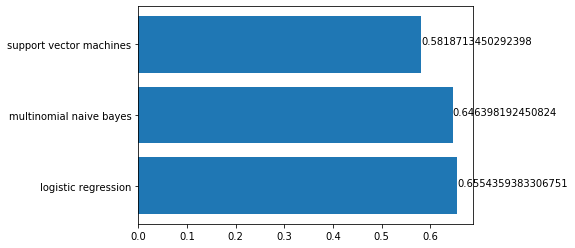

In [41]:
#countvec accuracy score for all models:
values=list(countvecd.values())
idx=list(countvecd.keys())
plt.barh(idx,values)
for index, value in enumerate(values):
    plt.text(value, index, str(value))

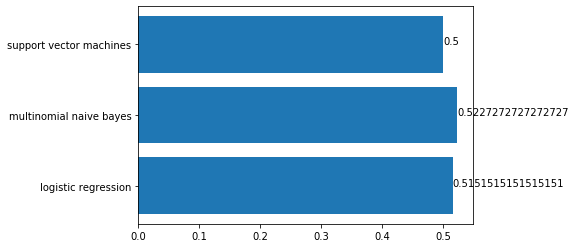

In [42]:
#tfidf vec accuracy score for all models:
values=list(tfidfvecd.values())
idx=list(tfidfvecd.keys())
plt.barh(idx,values)
for index, value in enumerate(values):
    plt.text(value, index, str(value))

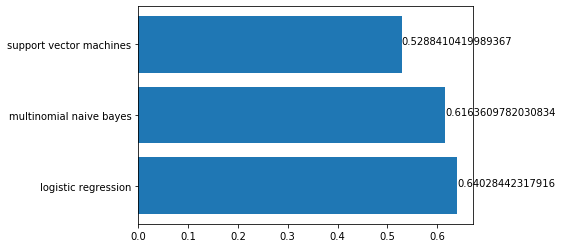

In [17]:
#ngram accuracy score for all models:
values=list(ngramd.values())
idx=list(ngramd.keys())
plt.barh(idx,values)
for index, value in enumerate(values):
    plt.text(value, index, str(value))


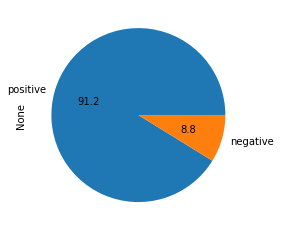

In [18]:
#sentiment analysis:
pos=sum([1 for w in y_test if w==1])
neg=sum([1 for w in y_test if w==0])
review_test=pd.Series({'positive':round((pos*100)/len(y_test),3),'negative':round((neg*100)/len(y_test),3)})
review_test.plot.pie(autopct=lambda x:round(x,3))


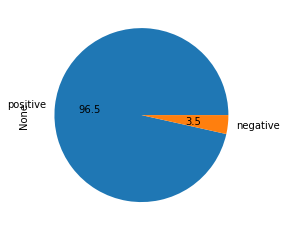

In [19]:
#sentiment analysis for count vectorizer using logistic regression
pos=sum([1 for w in prediction11 if w==1])
neg=sum([1 for w in prediction11 if w==0])
review_test=pd.Series({'positive':round((pos*100)/len(y_test),1),'negative':round((neg*100)/len(y_test),1)})
review_test.plot.pie(autopct=lambda x:round(x,3))


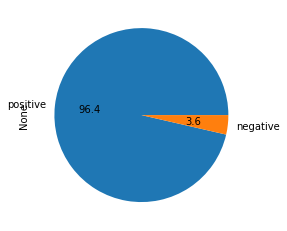

In [20]:
#sentiment analysis for count vectorizer using naive bayes
pos=sum([1 for w in prediction21 if w==1])
neg=sum([1 for w in prediction21 if w==0])
review_test=pd.Series({'positive':round((pos*100)/len(y_test),1),'negative':round((neg*100)/len(y_test),1)})
review_test.plot.pie(autopct=lambda x:round(x,3))

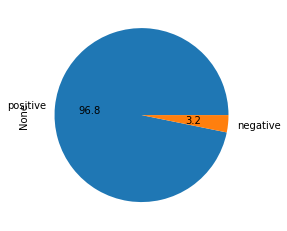

In [21]:
#sentiment analysis for ngram using logistic regression
pos=sum([1 for w in prediction13 if w==1])
neg=sum([1 for w in prediction13 if w==0])
review_test=pd.Series({'positive':round((pos*100)/len(y_test),1),'negative':round((neg*100)/len(y_test),1)})
review_test.plot.pie(autopct=lambda x:round(x,3))

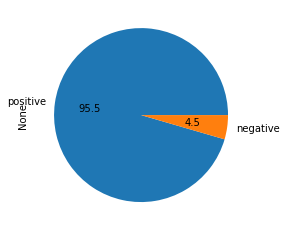

In [22]:
#sentiment analysis for ngram using naive bayes
pos=sum([1 for w in prediction23 if w==1])
neg=sum([1 for w in prediction23 if w==0])
review_test=pd.Series({'positive':round((pos*100)/len(y_test),1),'negative':round((neg*100)/len(y_test),1)})
review_test.plot.pie(autopct=lambda x:round(x,3))

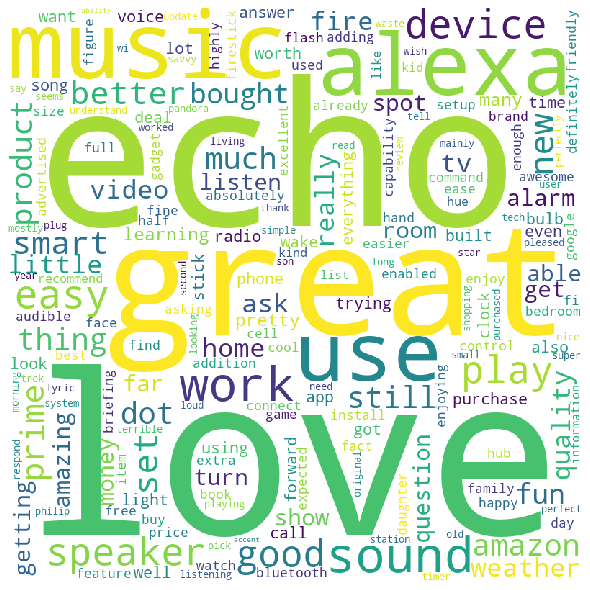

In [23]:
#making a word cloud
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(feature_names23)) 
  

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [24]:
#analysing custom document:
x=[['i enjoyed it very much'],['i love this product']]
for i in range(len(x)):
    x[i]=str(x[i]).lower()
    x[i]=re.sub('[^a-zA-Z]',' ',x[i])
    x[i]=(' ').join([w for w in x[i].split(' ') if not w==''])
    x[i]=(' ').join([wnlemma.lemmatize(w) for w in nltk.word_tokenize(x[i]) if not w in stop_words])
    doc=nltk.word_tokenize(x[i])
    postag=nltk.pos_tag(doc)
    postag=[s for s in postag if (a.search(s[1])!=None or b.search(s[1])!=None or c.search(s[1])!=None or d.search(s[1])!=None )]
    x[i]=(' ').join([s[0] for s in postag])
vect=CountVectorizer(min_df=5,ngram_range=(1,2)).fit(x_train)
x_train_vectorized=vect.transform(x_train)
model23=naive_bayes.MultinomialNB()
model23.fit(x_train_vectorized,y_train)
predictions=model23.predict(vect.transform(x))
print(CountVectorizer(ngram_range=(1,2)).fit(x).get_feature_names())


for w in predictions:
    if(w==1):
        print('positive')
    else:
        print('negative')



['enjoyed', 'enjoyed much', 'love', 'love product', 'much', 'product']
positive
positive
